Espacio de observación 
El estado es un vector de 8 dimensiones: las coordenadas del módulo de aterrizaje en x& y, sus velocidades lineales en x& y, su ángulo, su velocidad angular y dos valores booleanos que representan si cada pata está en contacto con el suelo o no.
UCB significa Upper Confidence Bound (UCB)

In [1]:
#Selección de acciones con intervalo de confianza
import gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
#Este es el agente que se encarga de entrenar el modelo y de graficar los resultados
#Se encarga de discretizar el estado, de crear los bins, de seleccionar la accion con el metodo de UCB y de entrenar el modelo
class Agente:
    #Se inicializan las variables del agente
    def __init__(self, env_name, num_bins=10, episodes=5000, learning_rate=0.2, discount_factor=0.90, render=False):
        #el self se utiliza para referirse a las variables de la clase
        self.env = gym.make(env_name, render_mode="human" if render else None)
        self.rewards_per_episode =np.zeros(episodes)   
        self.num_bins = num_bins
        self.episodes = episodes
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.bins = self.create_bins()
        self.q_table = np.zeros([num_bins] * len(self.env.observation_space.low) + [self.env.action_space.n])
        self.action_counts = np.zeros([num_bins] * len(self.env.observation_space.low) + [self.env.action_space.n])
        self.rng = np.random.default_rng()
#Se discretiza el estado
    def discretize_state(self, state):
        discrete_state = tuple(
            np.digitize(state[i], self.bins[i]) - 1 for i in range(len(state))
        )
        return discrete_state
#Se crean los bins
#los bins sirven para discretizar el estado
    def create_bins(self):
        bins = []
        for i in range(len(self.env.observation_space.low)):
            bins.append(np.linspace(self.env.observation_space.low[i], self.env.observation_space.high[i], self.num_bins + 1)[1:-1])
        return bins
#Se selecciona la accion con el metodo de UCB
#glosario
#q_values = valores de la tabla Q para el estado s
#action_counts = cuenta de las veces que se ha seleccionado la accion a en el estado s
#t = tiempo
#ucb_values = valores de la tabla UCB para el estado s
#np.argmax = devuelve el indice del valor maximo
    def ucb(self, q_values, action_counts, t):
        ucb_values = q_values + np.sqrt(2 * np.log(t + 1) / (action_counts + 1e-5))
        return np.argmax(ucb_values)
#Se entrena el modelo
    def train(self, is_training=True, render=False):
        if not is_training:
            with open("lunar_lander.pkl", "rb") as f:
                self.q_table = pickle.load(f)
        
      
        #Se inicializa el ambiente
        for i in range(self.episodes):
            state = self.env.reset()[0]
            discrete_state = self.discretize_state(state)
            
            terminated = False
            truncated = False
            t = 0
            #Se ejecuta el episodio
            while not terminated and not truncated:
                action = self.ucb(self.q_table[discrete_state], self.action_counts[discrete_state], t)
                
                new_state, reward, terminated, truncated, _ = self.env.step(action)
                new_discrete_state = self.discretize_state(new_state)

                if is_training:
                    #Se actualiza la tabla Q
                    #la formula utilizada aqui es? Q(s,a) = Q(s,a) + alpha * (R + gamma * max(Q(s',a')) - Q(s,a)) 
                    #la formula se llama ecuacion de Bellman
                    #glosario
                    #Q(s,a) = valor de la tabla Q para el estado s y la accion a
                    #alpha = tasa de aprendizaje
                    #R = recompensa
                    #gamma = factor de descuento
                    #max(Q(s',a')) = valor maximo de la tabla Q para el estado s' y todas las acciones a'
                    self.q_table[discrete_state + (action,)] += self.learning_rate * (
                        reward + self.discount_factor * np.max(self.q_table[new_discrete_state]) - self.q_table[discrete_state + (action,)]
                    )
                
                self.action_counts[discrete_state + (action,)] += 1
                
                state = new_state
                discrete_state = new_discrete_state
                t += 1
            print(f"Episode {i}, Reward {reward}, Terminated {terminated}, Truncated {truncated}")   
            self.rewards_per_episode[i] = reward
            
        self.env.close()
#Se guarda el modelo
        if is_training:
            with open("lunar_lander.pkl", "wb") as f:
                pickle.dump(self.q_table, f)
    #Se grafican los resultados
    def graficar(self):
        plt.plot(np.arange(self.episodes), self.rewards_per_episode)
        plt.xlabel("Episodio")
        plt.ylabel("Recompensa")
        plt.title("Recompensa por episodio")
        plt.show()    
#Se ejecuta el agente
# if __name__ == "__main__":
    # agente = Agente("LunarLander-v2", episodes=15000, render=False)
    # agente.train(is_training=True, render=False)
   
    

In [2]:
#que se ahce aqui? se entrena el modelo y se renderiza en cada episodio

agente = Agente("LunarLander-v2", episodes=5000, render=False)
agente.train(is_training=False, render=True)

c:\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, Reward -100, Terminated True, Truncated False
Episode 1, Reward -100, Terminated True, Truncated False
Episode 2, Reward -100, Terminated True, Truncated False
Episode 3, Reward -100, Terminated True, Truncated False
Episode 4, Reward -100, Terminated True, Truncated False
Episode 5, Reward -100, Terminated True, Truncated False
Episode 6, Reward -100, Terminated True, Truncated False
Episode 7, Reward -100, Terminated True, Truncated False
Episode 8, Reward -100, Terminated True, Truncated False
Episode 9, Reward -100, Terminated True, Truncated False
Episode 10, Reward -100, Terminated True, Truncated False
Episode 11, Reward -100, Terminated True, Truncated False
Episode 12, Reward -100, Terminated True, Truncated False
Episode 13, Reward -100, Terminated True, Truncated False
Episode 14, Reward -100, Terminated True, Truncated False
Episode 15, Reward -100, Terminated True, Truncated False
Episode 16, Reward -100, Terminated True, Truncated False
Episode 17, Reward -100,

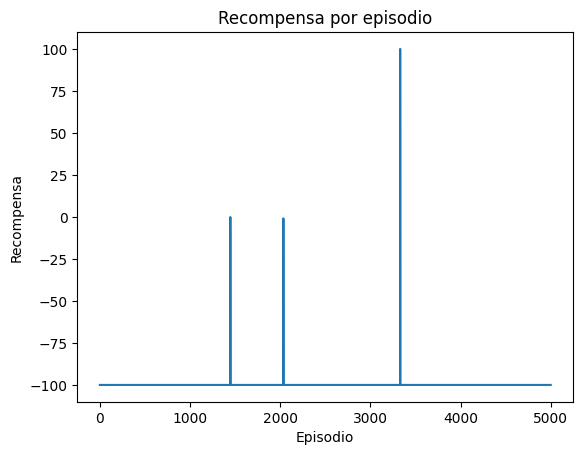

In [3]:
#Se grafican los resultados
agente.graficar()

In [4]:
agente = Agente("LunarLander-v2", episodes=20, render=True)
agente.train(is_training=False, render=True)

Episode 0, Reward -100, Terminated True, Truncated False
Episode 1, Reward -100, Terminated True, Truncated False
Episode 2, Reward -100, Terminated True, Truncated False
Episode 3, Reward -100, Terminated True, Truncated False
Episode 4, Reward -100, Terminated True, Truncated False
Episode 5, Reward -100, Terminated True, Truncated False
Episode 6, Reward -100, Terminated True, Truncated False
Episode 7, Reward -100, Terminated True, Truncated False
Episode 8, Reward -100, Terminated True, Truncated False
Episode 9, Reward -100, Terminated True, Truncated False
Episode 10, Reward -100, Terminated True, Truncated False
Episode 11, Reward -100, Terminated True, Truncated False
Episode 12, Reward -100, Terminated True, Truncated False
Episode 13, Reward -100, Terminated True, Truncated False
Episode 14, Reward -100, Terminated True, Truncated False
Episode 15, Reward -100, Terminated True, Truncated False
Episode 16, Reward -100, Terminated True, Truncated False
Episode 17, Reward -100,